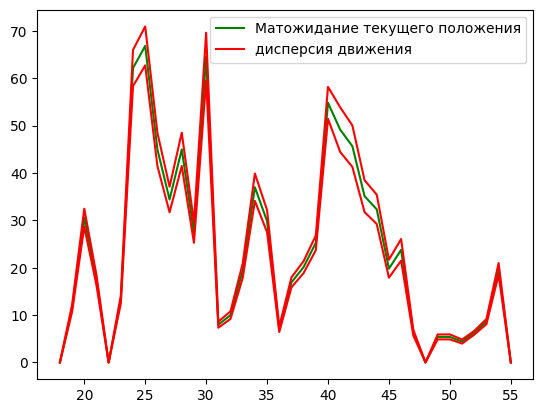

In [53]:
import numpy as np

from base import *
from kfspeed import *
import matplotlib.pyplot as plt
GPSTime, DeviceTime, GPSSpeed, OBDSpeed, Longitude, Latitude, Bearing = values('data1.csv')
dGPS = 30
dOBD = 30
speed = []
kf = KF1(dOBD,dGPS)
for k in range(len(GPSTime)):
    dGPS = GPSSpeed[k]/10
    dOBD = OBDSpeed[k*10]/10
    if (k - 15)//60 >= 25-18 and (k - 15)//60 <= 35-18:
        kf.updatedisp(dOBD,999999999999999)
    elif (k - 15)//60 >= 40-18 and (k - 15)//60 <= 50-18:
        kf.updatedisp(999999999999999,dGPS)
    elif (k - 15)//60 >= 35-18 and (k - 15)//60 <= 40-18 or (k - 15)//60 >= 50-18 or (k - 15)//60 <= 25-18:
        kf.updatedisp(dOBD, dGPS)
    #('GPS time:',GPSTime[k],'OBD time:',DeviceTime[k*10])
    kf.predict()
    kf.sensGPS(GPSSpeed[k])
    speed.append(kf.sensOBD(OBDSpeed[k*10]))
    for i in range(1,10):
        try:
            dGPS = GPSSpeed[k] / 10
            dOBD = OBDSpeed[k*10+i] / 10
            if (k - 15) // 60 >= 25 - 18 and (k - 15) // 60 <= 35 - 18:
                kf.updatedisp(dOBD, 999999999999999)
            elif (k - 15) // 60 >= 40 - 18 and (k - 15) // 60 <= 50 - 18:
                kf.updatedisp(999999999999999, dGPS)
            elif (k - 15) // 60 >= 35 - 18 and (k - 15) // 60 <= 40 - 18 or (k - 15) // 60 >= 50 - 18 or (k - 15)//60 <= 25-18:
                kf.updatedisp(dOBD, dGPS)
            kf.predict()
            speed.append(kf.sensOBD(OBDSpeed[k*10+i]))
        except IndexError:
            continue

speed = np.array(speed)


pointx = [DeviceTime[i]/60 + 18 for i in range(0,len(DeviceTime),600)]
pointy = [speed[i,0] for i in range(0,len(DeviceTime),600)]
pointy2 = np.array([[speed[i,0] + speed[i,1],speed[i,0] - speed[i,1]] for i in range(0,len(DeviceTime),600)])

plt.plot(pointx, pointy,label='Матожидание текущего положения',color = 'g')
plt.plot(pointx,pointy2[:,0],label='дисперсия движения',color = 'r')
plt.plot(pointx,pointy2[:,1],color = 'r')
plt.legend()
plt.show()


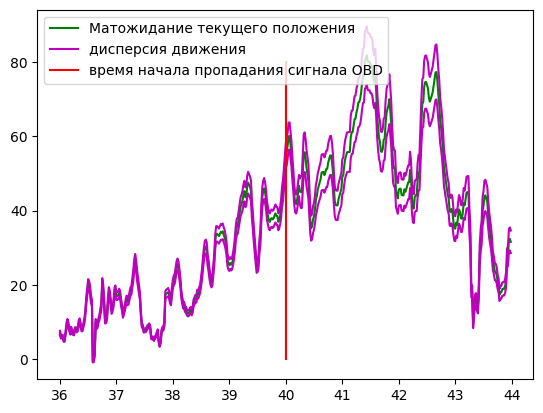

In [57]:
timewidth = 600*4
time = 40
plotx = [DeviceTime[i]/60 + 18 for i in range(((time-18)*60)*10-timewidth,((time-18)*60)*10+timewidth,10)]
ploty = [speed[i,0] for i in range(((time-18)*60)*10-timewidth,((time-18)*60 )*10+timewidth,10)]
ploty2 = np.array([[speed[i,0] + speed[i,1],speed[i,0] - speed[i,1]] for i in range(((time-18)*60 )*10-timewidth,((time-18)*60 )*10+timewidth,10)])
plt.plot(plotx,ploty,label='Матожидание текущего положения',color = 'g')
plt.plot(plotx,ploty2[:,0],label='дисперсия движения',color = 'm')
plt.plot(plotx,ploty2[:,1],color = 'm')
plt.plot([DeviceTime[((time-18)*60 )*10]/60 + 18 ,DeviceTime[((time-18)*60 )*10]/60 + 18 ],[0,80],label='время начала пропадания сигнала OBD',color = 'r')
plt.legend()
plt.show()

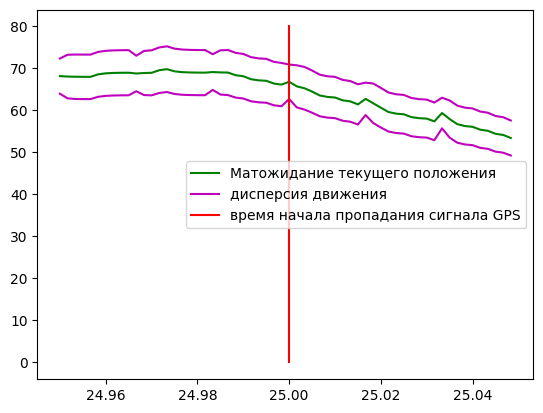

In [60]:
timewidth = 30*1
time = 25
rangeleft = int(((time-18)*60)*10-timewidth)
rangeright = int(((time-18)*60)*10+timewidth)
plotx = [DeviceTime[i]/60 + 18 for i in range(rangeleft,rangeright)]
ploty = [speed[i,0] for i in range(rangeleft,rangeright)]
ploty2 = np.array([[speed[i,0] + speed[i,1],speed[i,0] - speed[i,1]] for i in range(rangeleft,rangeright)])
plt.plot(plotx,ploty,label='Матожидание текущего положения',color = 'g')
plt.plot(plotx,ploty2[:,0],label='дисперсия движения',color = 'm')
plt.plot(plotx,ploty2[:,1],color = 'm')
plt.plot([DeviceTime[int(((time-18)*60)*10)]/60 + 18 ,DeviceTime[int(((time-18)*60)*10)]/60 + 18 ],[0,80],label='время начала пропадания сигнала GPS',color = 'r')
plt.legend()
plt.show()